In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from olac import data_generators
from olac import vis
from olac import popping_clusters as pop

%matplotlib inline
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from keras.models import Sequential
from keras.layers import Dense
import keras.layers as ly

Using TensorFlow backend.


Initialize the model

In [5]:
model = Sequential()
model.add(ly.Dense(units=2, activation='relu', input_dim=2))
model.add(ly.Dense(units=6, activation='relu'))
model.add(ly.Dense(units=12, activation='relu'))
model.add(ly.Dense(units=6, activation='relu'))
model.add(ly.Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Making sure the model works with the demo.main for both generators

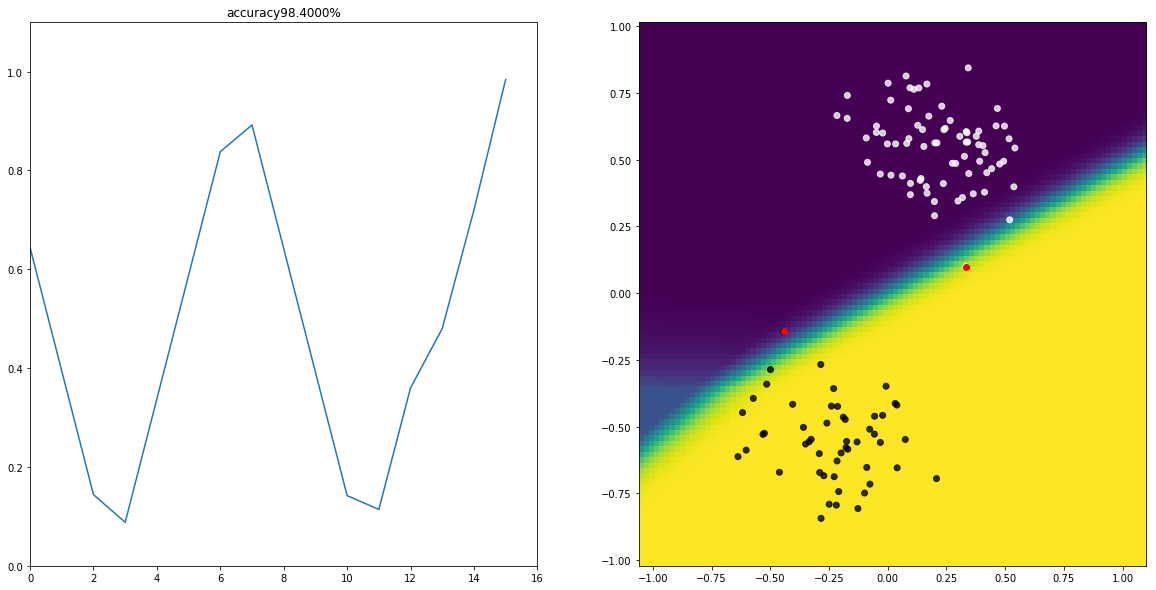

In [4]:
vis.main(model, data_generators.roving_balls, 'accuracy', steps=2000, p_train=10, window=500)

Recompile the model and train on popping cluster data

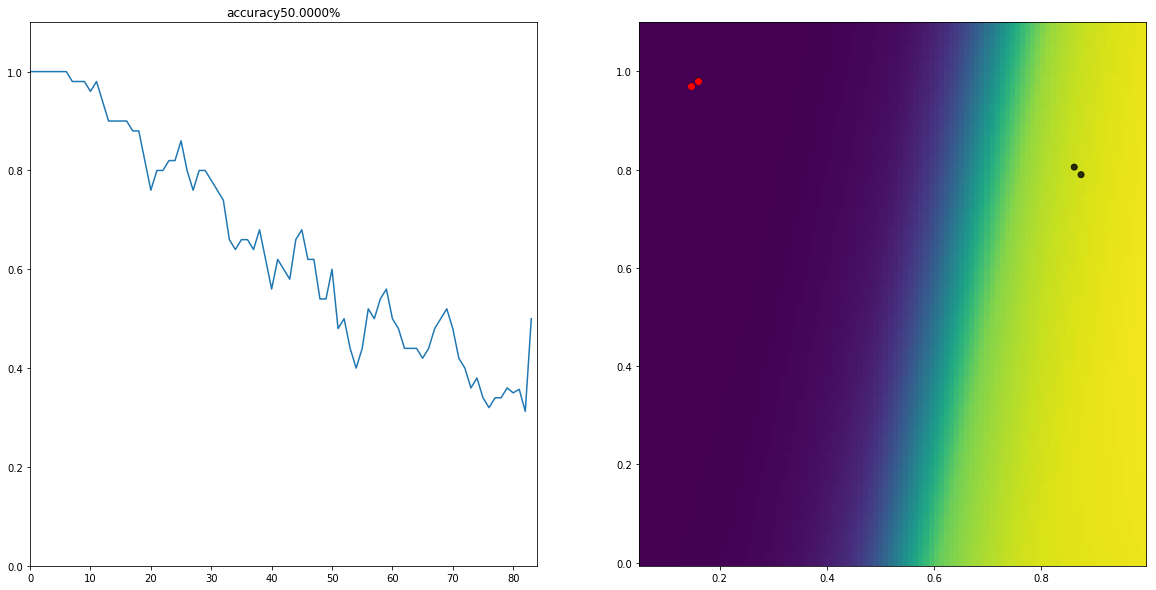

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
vis.main(model, pop.cluster_generator, 'accuracy', n_points=1000, p_train=20, window=50)

## Creating updated labels

In [13]:
from olac.utils import *
import tqdm

In [16]:
train_set = []
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
for dp in data_generators.roving_balls():
    i+=1
    while i < 100:
        train_set.append(dp)
        
    if i == 100:
        model.fit(np.array(train_set)[:,:2], np.array(train_set)[:,-1])
        plt.imshow(vis.get_fun_map((0,1), (0,1),1,model), origin='lower')
        y=model.predict(np.array(train_set)[:,:2])
        plt.scatter(np.array(train_set)[(y==0)[:,0],:2], 'r')
        plt.scatter(np.array(train_set)[(y==1)[:,0],:2], 'b')
        cont = input()
        if cont != 'Y':
            break


/Users/sgroothuis/Documents/Projecten/JADS/olac/olac/olac/utils.py:48: UserWarning: The 'utils.rotation_matrix' method is deprecated, use maths.rotation_matrix(theta: float) instead
  warnings.warn("The 'utils.rotation_matrix' method is deprecated, use maths.rotation_matrix(theta: float) instead")


KeyboardInterrupt: 

In [59]:
batch_size = 20
ind = 400

train_set = pd.DataFrame(data_generators.roving_balls(steps=2000))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_set.iloc[:ind,:2].values, train_set.iloc[:ind,-1].values, epochs=20, verbose=False)

for batch in np.arange(0,len(train_set.iloc[ind:,:]), batch_size):
    
    y_lab = model.predict(train_set.iloc[ind:ind+batch_size,:2])
    print('Accuracy: ',(train_set.iloc[ind:ind+batch_size,-1].values == np.round(y_lab[:,0])).mean(),'%')
    ind +=batch_size
    plt.scatter(*train_set.iloc[ind:ind+batch_size,:2].values.T)

/Users/sgroothuis/Documents/Projecten/JADS/olac/olac/olac/utils.py:48: UserWarning: The 'utils.rotation_matrix' method is deprecated, use maths.rotation_matrix(theta: float) instead
  warnings.warn("The 'utils.rotation_matrix' method is deprecated, use maths.rotation_matrix(theta: float) instead")


Accuracy:  1.0 %
Accuracy:  0.85 %
Accuracy:  0.6 %
Accuracy:  0.25 %
Accuracy:  0.1 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.0 %
Accuracy:  0.05 %
Accuracy:  0.2 %
Accuracy:  0.3 %
Accuracy:  0.85 %
Accuracy:  0.85 %
Accuracy:  0.95 %
Accuracy:  0.95 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  1.0 %
Accuracy:  0.95 %
Accuracy:  1.0 %
Accuracy:  0.85 %
Accuracy:  0.8 %
Accuracy:  0.4 %
Accuracy:  0.0 %
Accuracy:  0.05 %
Accuracy:  0.05 %
Accuracy:  0.0 %
Acc